In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

### Inspect and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.shape

(1309, 14)

In [5]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# To get percentage of missing values in a column
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [8]:
df.isnull().sum(axis=1).loc[:20]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
11    1
12    1
13    3
14    1
15    4
16    2
17    1
18    2
19    1
20    1
dtype: int64

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
mask = df.isnull().any(axis=1)
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [11]:
df[mask].body.head()

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [12]:
df.sex.value_counts(dropna=False)

sex
male      843
female    466
Name: count, dtype: int64

In [13]:
df.embarked.value_counts(dropna=False)

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

### Create Features

In [14]:
name = df.name

In [15]:
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [16]:
df = df.drop(columns=["name",
                      "ticket",
                      "home.dest",
                      "boat",
                      "body",
                      "cabin"])


In [17]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
df['sex_male'] = df['sex_male'].astype('int64')
df['embarked_Q'] = df['embarked_Q'].astype('int64')
df['embarked_S'] = df['embarked_S'].astype('int64')

In [19]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

### Split Data

In [20]:
y = df.survived
X = df.drop(["survived"], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.isnull().sum()

pclass          0
age           187
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

### Impute Data

In [24]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [25]:
# Fix null values in X dataframe for Chapter 8
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X[cols_to_impute] = imp_mode.fit_transform(X[cols_to_impute])

In [26]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

In [27]:
X_train.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [28]:
X_test.isnull().sum()

pclass         0
age           76
sibsp          0
parch          0
fare           0
sex_male       0
embarked_Q     0
embarked_S     0
dtype: int64

In [29]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])

In [30]:
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

### Normalize Data

In [31]:
# To be used for data scaling (normalizing)
from sklearn.preprocessing import StandardScaler

In [32]:
# easier way of building out a list when you have a lot of values/columns to add 
cols = "pclass,age,sibsp,parch,fare".split(",")
#cols = X_train.columns
cols

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [33]:
sca = StandardScaler()
sca.fit(X_train[cols])
X_train[cols] = sca.transform(X_train[cols])

sca.fit(X_test[cols])
X_test[cols] = sca.transform(X_test[cols])

In [34]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.070918,-0.498616,-0.432553,-0.474092,1,0,1
677,0.825248,-0.232596,-0.498616,-0.432553,-0.488616,1,0,1
534,-0.363317,-0.798468,-0.498616,-0.432553,-0.145647,0,0,1
1174,0.825248,-0.070918,6.897852,1.805972,0.679370,0,0,1
864,0.825248,-0.070918,-0.498616,-0.432553,-0.490904,0,0,1


### Chapter 8 part 2 starts here

### Collinear Columns

In [35]:
#pip install rfpimp

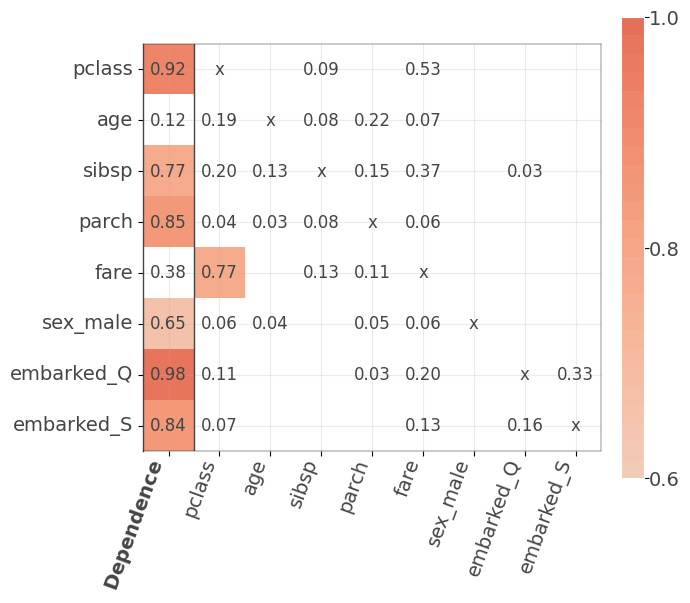

In [36]:
# Create a heatmap showing the correlations between features

import matplotlib.pyplot as plt
from rfpimp import (
    plot_dependence_heatmap,
    feature_dependence_matrix)

plot_dependence_heatmap(
        feature_dependence_matrix(X_train),
        value_fontsize=12,
        label_fontsize=14,
        figsize=(7,7))
fig = plt.gcf()
    

In [37]:
# remove the high correlated features above and get the accuracy score
from sklearn.ensemble import RandomForestClassifier

cols_to_remove = [
        "pclass","sibsp","parch","embarked_Q"]

rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train[[c for c in X_train.columns
                 if c not in cols_to_remove]], 
        y_train)
rf3.score(X_test[[c for c in X_train.columns
                 if c not in cols_to_remove]],
         y_test)

0.7633587786259542

In [38]:
# get the accuracy score without the high correlated features removed
rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train, y_train)
rf4.score(X_test, y_test)

0.7964376590330788

### Lasso Regression

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

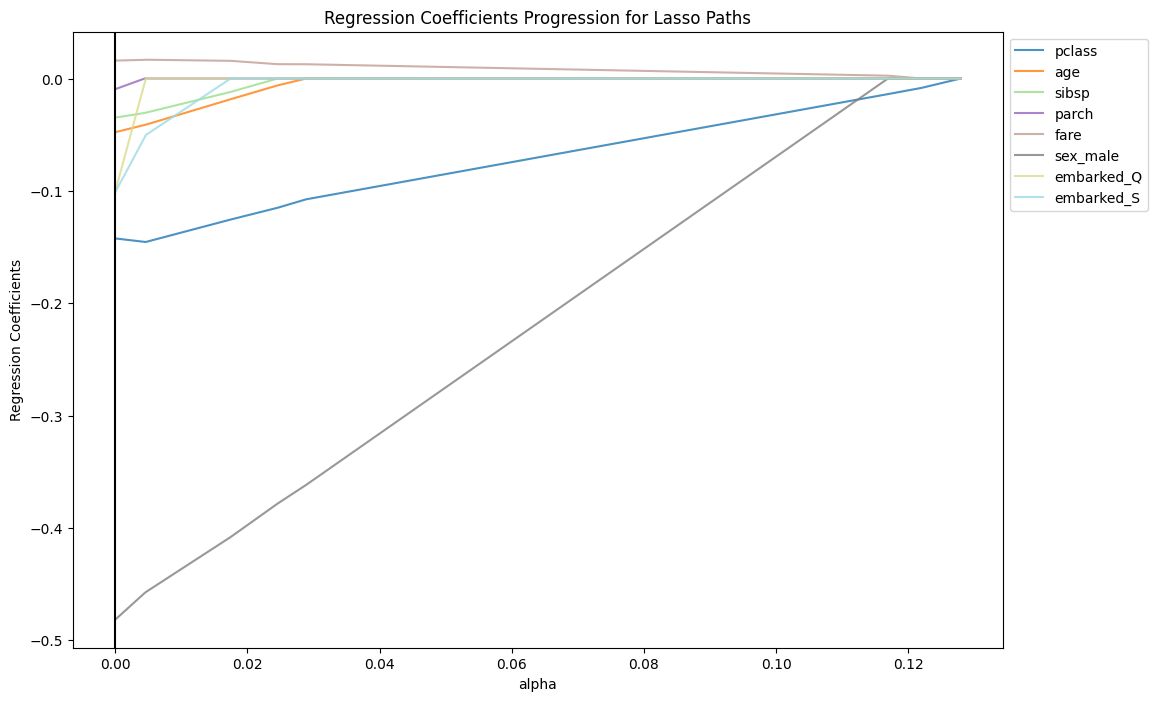

In [39]:
from sklearn.linear_model import LassoLarsCV

model = LassoLarsCV(cv=10, max_n_alphas=10).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12,8))
cm = iter (plt.get_cmap("tab20")(np.linspace(0,1, X.shape[1])))

for i in range(X.shape[1]):
    c = next(cm)
    ax.plot(model.alphas_,
            model.coef_path_.T[:,i],
            c=c,
            alpha=0.8,
            label=X.columns[i])
ax.axvline(
    model.alpha_,
    linestyle="-",
    c="k",
    label="alphaCV")

plt.ylabel("Regression Coefficients")
ax.legend(X.columns, bbox_to_anchor=(1,1))
plt.xlabel("alpha")
plt.title("Regression Coefficients Progression for Lasso Paths")


### Recursive Feature Elimination

In [40]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

array([1, 1, 2, 3, 1, 1, 5, 4])

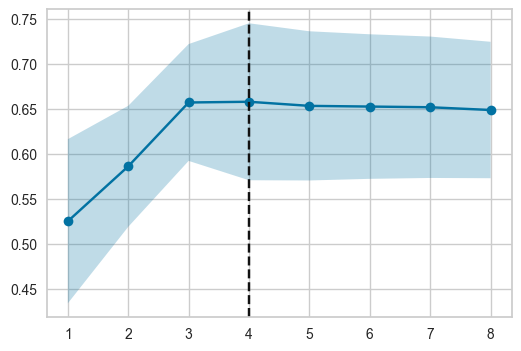

In [41]:
from yellowbrick.features import RFECV

fig, ax = plt.subplots(figsize=(6,4))
rfe = RFECV(RandomForestClassifier(n_estimators=100), cv=5)
rfe.fit(X,y)
rfe.rfe_estimator_.ranking_

In [42]:
rfe.rfe_estimator_.n_features_

4

In [43]:
rfe.rfe_estimator_.support_

array([ True,  True, False, False,  True,  True, False, False])

In [44]:
rfe.poof()

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [45]:
# Create a recursive Feature Elimation using sklearn RFE
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(X,y)
X.columns[rfe.support_]

Index(['pclass', 'age', 'sibsp', 'fare', 'sex_male'], dtype='object')

### Mutual Information

<Axes: ylabel='feature'>

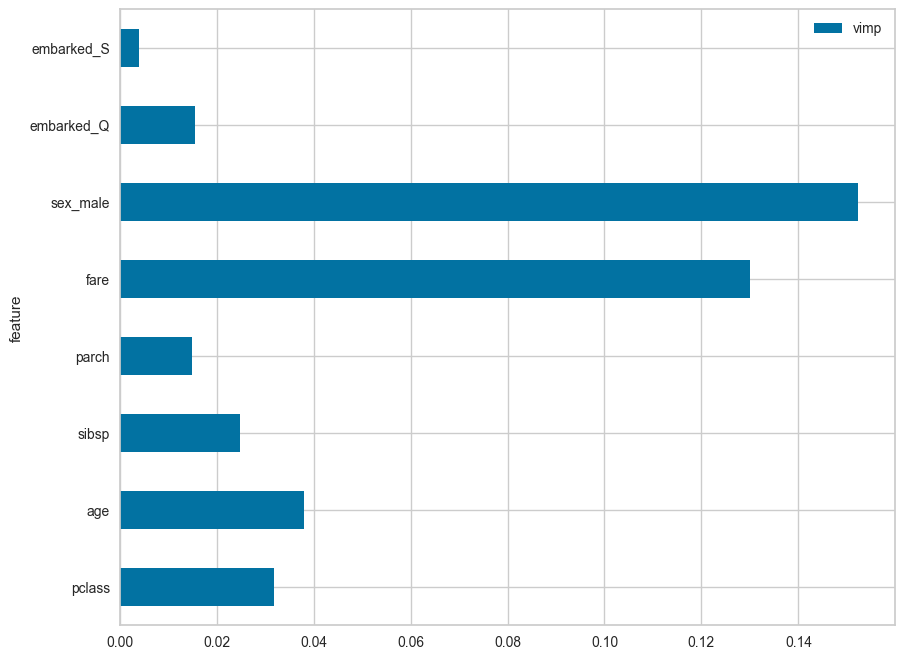

In [46]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X,y)

fig, ax = plt.subplots(figsize=(10,8))
(pd.DataFrame({"feature":X.columns, "vimp":mic})
     .set_index("feature")
     .plot.barh(ax=ax)
)

## Chapter 9 begins here

### Upsampling Minority

In [53]:
# upsample the smaller target value to the same number of records as the larger target
from sklearn.utils import resample
mask = df.survived==1

# Filter the dataset to ony include the survivors
# this has only 500 records and will be upsampled to the death_df size
surv_df = df[mask]

death_df = df[~mask]
df_upsample = resample(
    surv_df,
    replace=True,
    n_samples=len(death_df),
    random_state=42)

df2 = pd.concat([death_df, df_upsample])

df2.survived.value_counts()

survived
0    809
1    809
Name: count, dtype: int64

In [55]:
# upsample the smaller target value to the same number of records as the larger target
from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X,y)
pd.Series(y_ros).value_counts()

survived
1    809
0    809
Name: count, dtype: int64

In [56]:
# downsample the larger group in the dataset to the size of the smaller group in the dataset
df_downsample = resample(
    death_df,
    replace=False,
    n_samples = len(surv_df),
    random_state=42)

df3 = pd.concat([surv_df, df_downsample])

df3.survived.value_counts()

survived
1    500
0    500
Name: count, dtype: int64